# Data Audit

In [1]:
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv('../data/labels.csv')
    print("labels.csv loaded successfully.")
except FileNotFoundError:
    print("Error: labels.csv not found. Make sure the path is correct.")
    df = pd.DataFrame() # Create empty df to avoid further errors

# Load attributes
try:
    with open('../data/attributes.yaml', 'r') as f:
        attributes_yaml = yaml.safe_load(f)
    print("attributes.yaml loaded successfully.")
except FileNotFoundError:
    print("Error: attributes.yaml not found. Make sure the path is correct.")
    attributes_yaml = {}

df.head()


labels.csv loaded successfully.
attributes.yaml loaded successfully.


,image_path,class_label,attributes,caption,split,instance_id
0,images/team21_mouse_1.jpeg,electronics_mouse,color:black;material:plastic;pattern:unknown,A black mouse object.,train,team21_razer_gaming_mouse_black_plastic_plain
1,images/team21_mouse_2.jpeg,electronics_mouse,color:black;material:plastic;pattern:unknown,A black mouse object.,train,team21_razer_gaming_mouse_black_plastic_plain
2,images/team21_mouse_3.jpeg,electronics_mouse,color:black;material:plastic;pattern:unknown,A black mouse object.,train,team21_razer_gaming_mouse_black_plastic_plain
3,images/team21_mouse_4.jpeg,electronics_mouse,color:black;material:plastic;pattern:unknown,A black mouse object.,train,team21_razer_gaming_mouse_black_plastic_plain
4,images/team21_mouse_5.jpeg,electronics_mouse,color:black;material:plastic;pattern:unknown,A black mouse object.,train,team21_razer_gaming_mouse_black_plastic_plain


## 1. Class & Instance Stats

### Per-class Image Counts

Per-class image counts:
class_label
electronics_mouse        60
stationery_notebook      60
tableware_waterbottle    60
electronics_keyboard     60
clothing_wristwatch      60
tools_screwdriver        60
travel_backpack          60
stationery_calculator    60
tableware_mug            60
footwear_sneakers        60
Name: count, dtype: int64


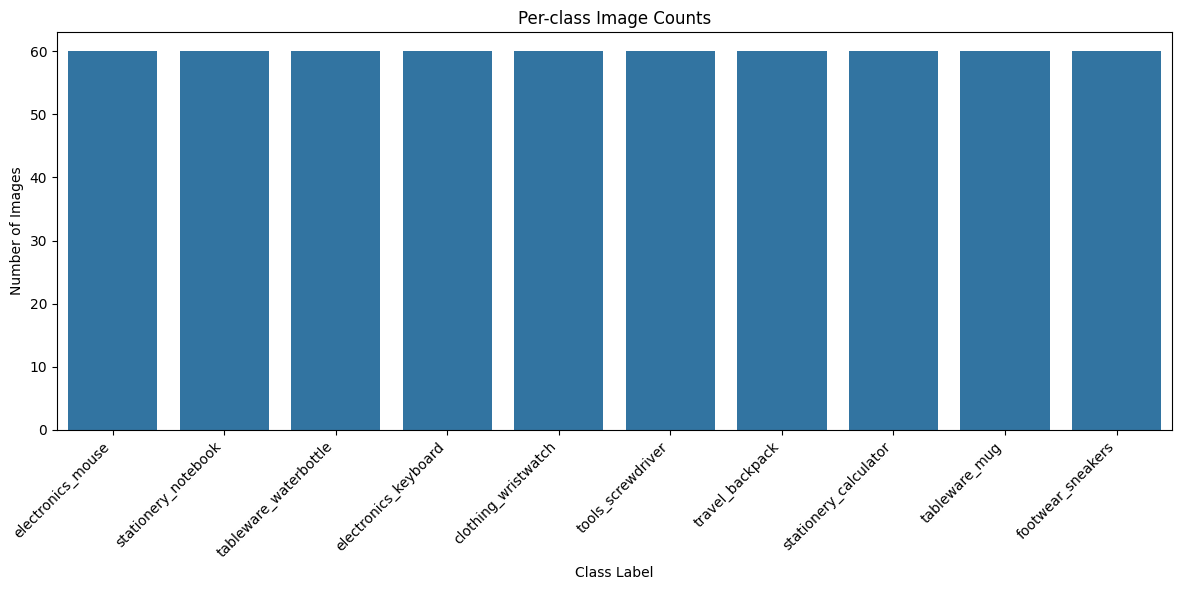

In [2]:
if not df.empty:
    class_counts = df['class_label'].value_counts()
    print("Per-class image counts:")
    print(class_counts)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=class_counts.index, y=class_counts.values)
    plt.title('Per-class Image Counts')
    plt.xlabel('Class Label')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


### Images per Instance ID Histogram

Images per instance_id distribution:
count    120.0
mean       5.0
std        0.0
min        5.0
25%        5.0
50%        5.0
75%        5.0
max        5.0
Name: count, dtype: float64


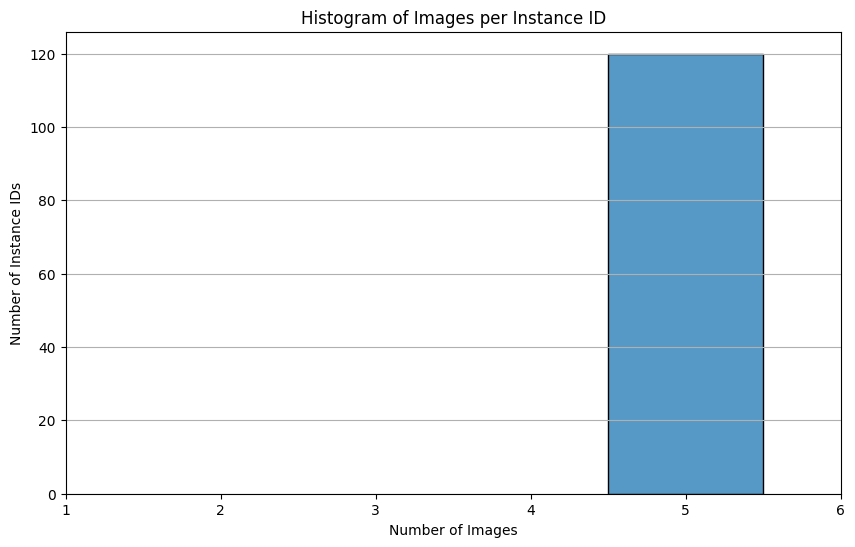

In [3]:
if not df.empty:
    instance_counts = df['instance_id'].value_counts()
    print("Images per instance_id distribution:")
    print(instance_counts.describe())

    plt.figure(figsize=(10, 6))
    sns.histplot(instance_counts.values, bins=range(1, instance_counts.max() + 2), discrete=True)
    plt.title('Histogram of Images per Instance ID')
    plt.xlabel('Number of Images')
    plt.ylabel('Number of Instance IDs')
    plt.xticks(range(1, instance_counts.max() + 2))
    plt.grid(axis='y')
    plt.show()


## 2. Attribute Distributions

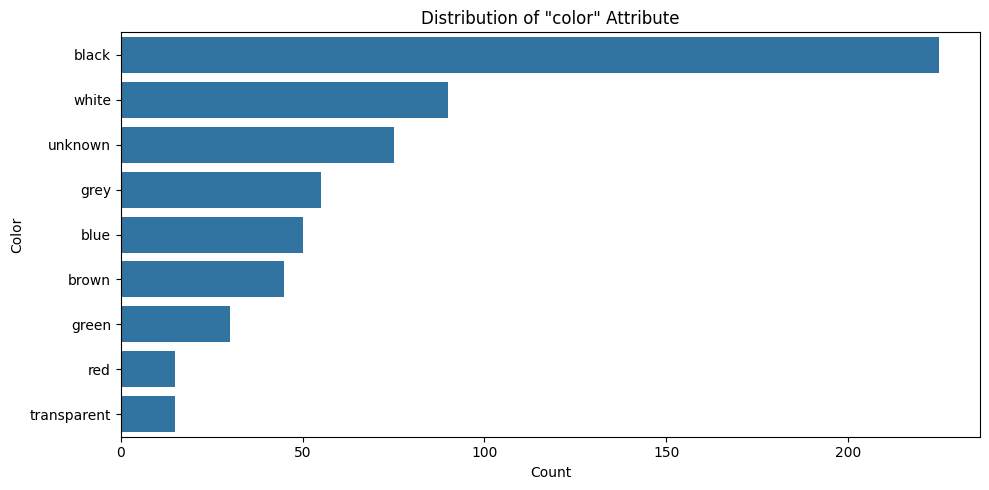

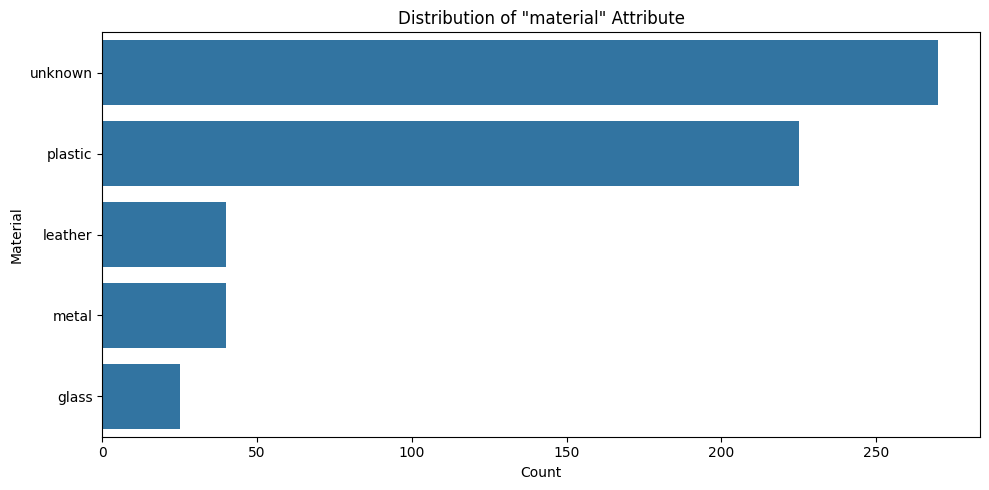

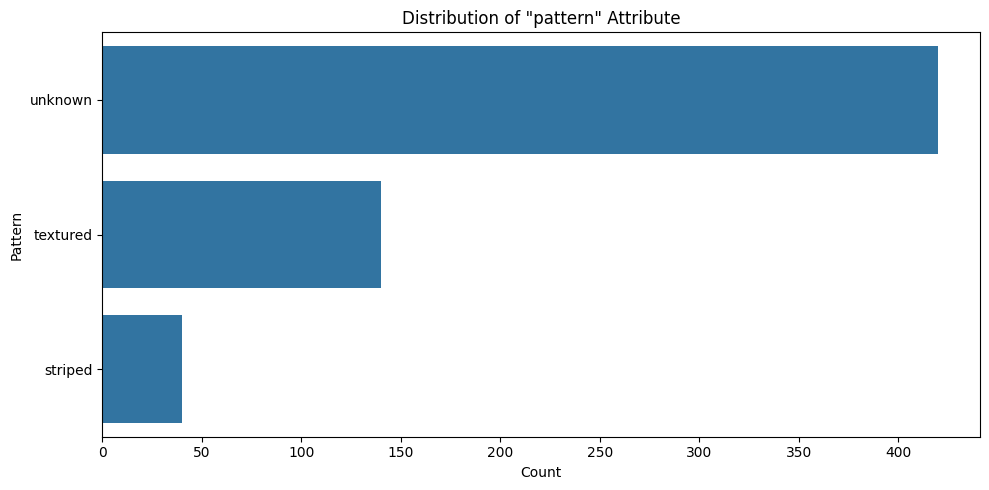

In [4]:
def parse_attributes(attr_str):
    """Parses the semicolon-separated attribute string into a dictionary."""
    if not isinstance(attr_str, str):
        return {}
    return dict(item.split(':') for item in attr_str.split(';'))

if not df.empty:
    # Expand attributes into their own columns
    attr_df = df['attributes'].apply(parse_attributes).apply(pd.Series)
    df_expanded = pd.concat([df, attr_df], axis=1)

    # Plot distribution for each attribute
    if attributes_yaml:
        for attribute, values in attributes_yaml.items():
            if attribute in df_expanded.columns:
                plt.figure(figsize=(10, 5))
                sns.countplot(y=df_expanded[attribute], order=df_expanded[attribute].value_counts().index)
                plt.title(f'Distribution of "{attribute}" Attribute')
                plt.xlabel('Count')
                plt.ylabel(attribute.capitalize())
                plt.tight_layout()
                plt.show()
            else:
                print(f"Warning: Attribute '{attribute}' from YAML not found in the data.")


## 3. Split Integrity

In [5]:
if not df.empty:
    train_instances = set(df[df['split'] == 'train']['instance_id'])
    val_instances = set(df[df['split'] == 'val']['instance_id'])

    overlap = train_instances.intersection(val_instances)

    if not overlap:
        print("✅ Split integrity check passed: No instance_ids found in both train and val splits.")
    else:
        print(f"❌ Split integrity check failed: {len(overlap)} instance_id(s) found in both splits.")
        print("Overlapping instance_ids:", overlap)


✅ Split integrity check passed: No instance_ids found in both train and val splits.


## 4. Risk Examples

This section is for identifying and displaying images that might pose challenges to the model. These could include images with:
- **Glare:** Reflections or bright spots that obscure the object.
- **Occlusion:** The object is partially hidden.
- **Look-alikes:** Objects that look similar to other classes.
- **Color Ambiguity:** Lighting conditions that make the object's color hard to determine.
- **'Unknown' Attributes:** Cases where attributes could not be confidently labeled.

Below are a few examples of images that could be considered risk examples. You can add more by displaying them here.

In [6]:
# This cell is for displaying risk example images.
# For now, we will just print the paths of some candidates.
# You can use libraries like PIL and matplotlib to display the images directly in the notebook.

if not df.empty:
    # Example: Find images with 'unknown' color
    unknown_color_df = df_expanded[df_expanded['color'] == 'unknown']
    print("Potential risk examples (unknown color):")
    if not unknown_color_df.empty:
        print(unknown_color_df['image_path'].head().to_list())
    else:
        print("No images with unknown color found.")

    # Example: Find images with 'transparent' material which can be tricky
    transparent_df = df_expanded[df_expanded['material'] == 'glass']
    print("Potential risk examples (transparent material):")
    if not transparent_df.empty:
        print(transparent_df['image_path'].head().to_list())
    else:
        print("No images with transparent material found.")


Potential risk examples (unknown color):
['images/team21_notebooks_1.jpeg', 'images/team21_notebooks_2.jpeg', 'images/team21_notebooks_3.jpeg', 'images/team21_notebooks_4.jpeg', 'images/team21_notebooks_5.jpeg']
Potential risk examples (transparent material):
['images/team21_mouse_11.jpeg', 'images/team21_mouse_12.jpeg', 'images/team21_mouse_13.jpeg', 'images/team21_mouse_14.jpeg', 'images/team21_mouse_15.jpeg']


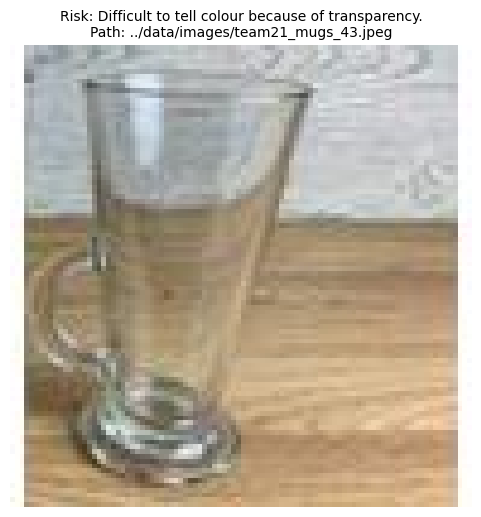

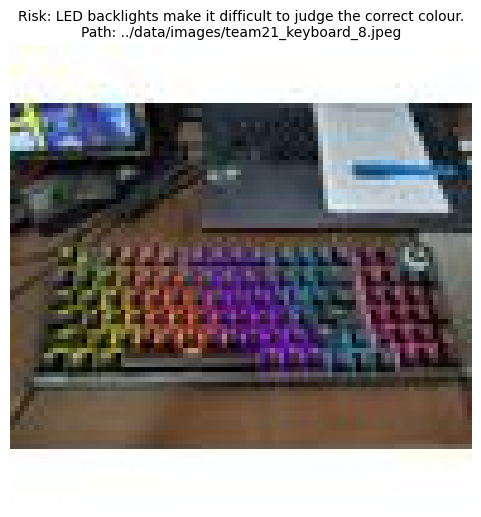

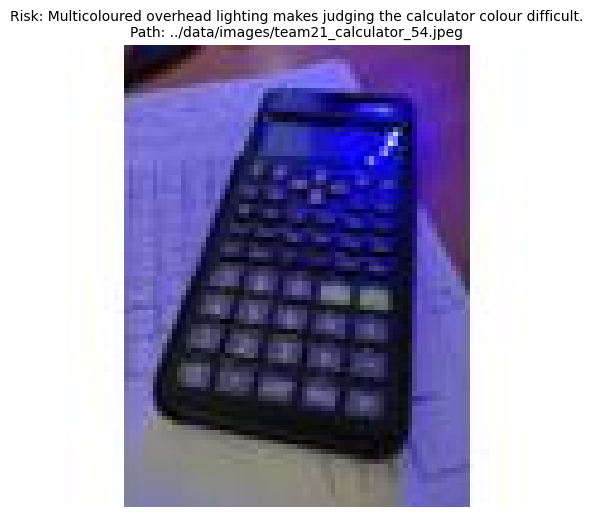

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Add a list of dictionaries for the risk examples
risk_examples = [
    {
        "path": "../data/images/team21_mugs_43.jpeg",
        "description": "Difficult to tell colour because of transparency."
    },
    {
        "path": "../data/images/team21_keyboard_8.jpeg",
        "description": "LED backlights make it difficult to judge the correct colour."
    },
    {
        "path": "../data/images/team21_calculator_54.jpeg",
        "description": "Multicoloured overhead lighting makes judging the calculator colour difficult."
    }
]

# Loop through and display each risk example
for example in risk_examples:
    image_path = example["path"]
    description = example["description"]
    
    if os.path.exists(image_path):
        try:
            img = Image.open(image_path)
            
            plt.figure(figsize=(6, 6))
            plt.imshow(img)
            plt.title(f"Risk: {description}\nPath: {image_path}", fontsize=10)
            plt.axis('off')
            plt.show()
            
        except Exception as e:
            print(f"Could not display image {image_path}. Error: {e}")
    else:
        print(f"Image not found at path: {image_path}")